In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("/content/healthcare-stroke.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.shape

(5110, 12)

In [8]:
df["bmi"] = df["bmi"].fillna(df["bmi"].mean())

In [9]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
df1 = pd.get_dummies(df,drop_first = True)

In [11]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [12]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.002999,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.002999,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


In [13]:
df.drop('id',axis = 1,inplace = True)

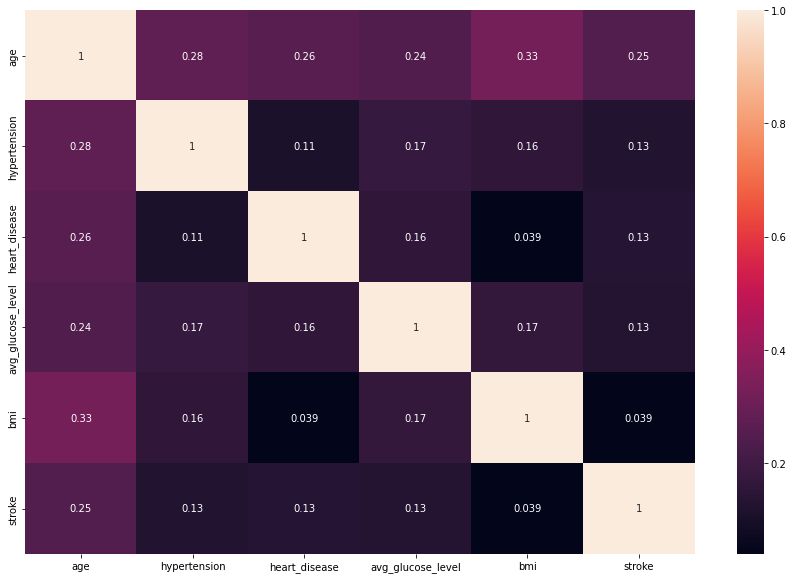

In [14]:
corr = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr,annot=True)

In [15]:
X = df[["stroke"]].value_counts(normalize = True)*100
label_stroke = X.keys().map({0:"No_Stroke",1:"Stroke"})

In [17]:
X

stroke
0         95.127202
1          4.872798
dtype: float64

([<matplotlib.patches.Wedge at 0x7f1cfa120110>,
 [Text(-2.1742723534906996, 0.3354694216258975, 'nan'),
  Text(2.17427241238238, -0.33546903993201144, 'nan')],
 [Text(-1.1859667382676542, 0.18298332088685318, '95.13%'),
  Text(1.1859667703903891, -0.18298311269018802, '4.87%')])

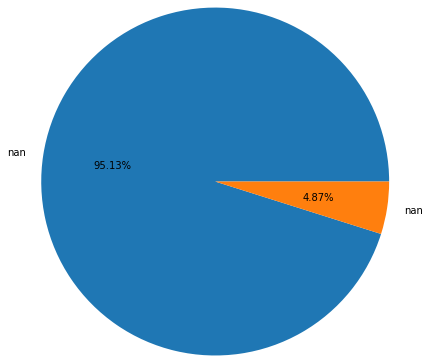

In [18]:
plt.pie(x=X,labels=label_stroke,radius = 2,autopct = "%1.2f%%")

#Distribution data

In [19]:
def bar_plot(variable):
    
    var = df[variable]
    variable_values = var.value_counts()
    
    plt.figure(figsize = (9,3))
    plt.bar(variable_values.index,variable_values)
    plt.ylabel("Frequency")
    plt.xlabel(variable)
    plt.show()
    print("{}:\n{}".format(variable,variable_values))

In [20]:
categorical = (df.dtypes == "object")
categorical_list = (categorical[categorical].index)
print("Categorical variables:")
print(categorical_list)

Categorical variables:
Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


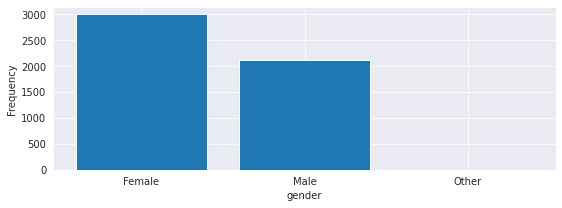

gender:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


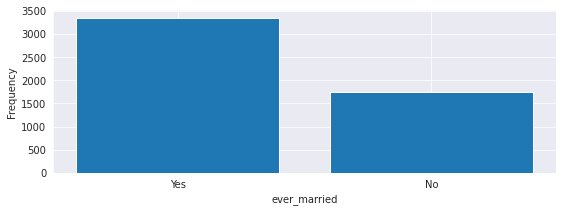

ever_married:
Yes    3353
No     1757
Name: ever_married, dtype: int64


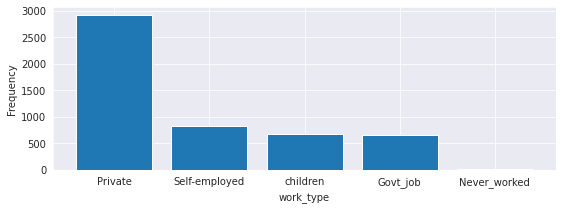

work_type:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


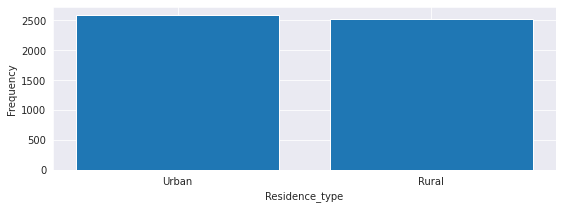

Residence_type:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


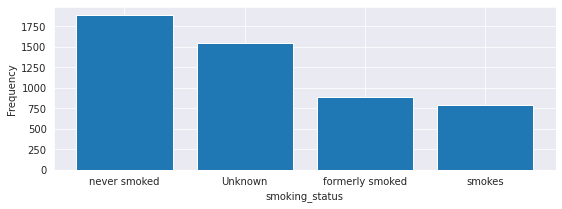

smoking_status:
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [21]:
sns.set_style("darkgrid")
categorical_varibles = ['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status']
for c in categorical_varibles:
    bar_plot(c)

#Stroke rate by gender

gender  stroke
Female  0         55.831703
Male    0         39.275930
Female  1          2.759295
Male    1          2.113503
Other   0          0.019569
dtype: float64


Text(0.5, 1.0, 'Stroke rate by Gender')

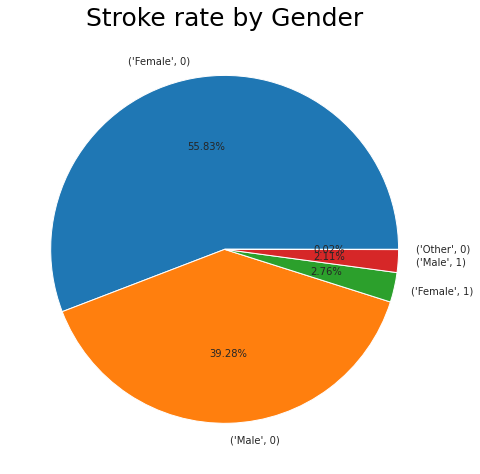

In [22]:
x = df[["gender","stroke"]].value_counts(normalize = True)*100
print(x)
labels = x.keys()

plt.figure(figsize = (8,8))
plt.pie(x=x, labels=labels, autopct='%1.2f%%')
plt.title("Stroke rate by Gender",color = 'black',fontsize = 25)

#Stroke rate by merital status



ever_married  stroke
Yes           0         61.311155
No            0         33.816047
Yes           1          4.305284
No            1          0.567515
dtype: float64


Text(0.5, 1.0, 'Stroke rate by marital status')

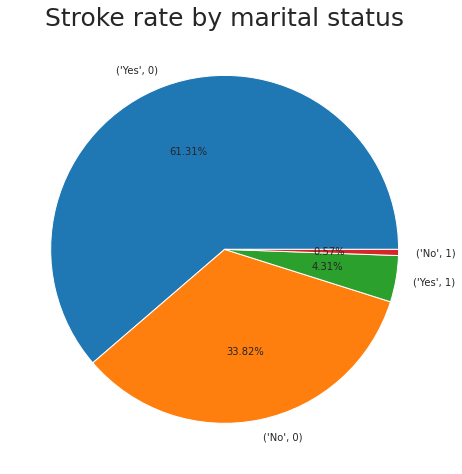

In [23]:
x = df[["ever_married","stroke"]].value_counts(normalize = True)*100
print(x)
labels = x.keys()

plt.figure(figsize = (8,8))
plt.pie(x,labels = labels,autopct = '%1.2f%%')
plt.title("Stroke rate by marital status" , fontsize = 25)

#Stroke rate by work type

In [24]:
x = df[["work_type","stroke"]].value_counts(normalize = True)*100
print(x)

work_type      stroke
Private        0         54.324853
Self-employed  0         14.755382
children       0         13.405088
Govt_job       0         12.211350
Private        1          2.915851
Self-employed  1          1.272016
Govt_job       1          0.645793
Never_worked   0          0.430528
children       1          0.039139
dtype: float64


#Stroke rate by residence type

Residence_type  stroke
Urban           0         48.160470
Rural           0         46.966732
Urban           1          2.641879
Rural           1          2.230920
dtype: float64


Text(0.5, 1.0, 'Stroke rate by residence type')

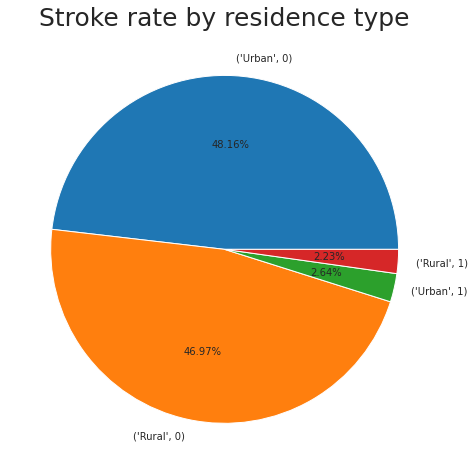

In [25]:
x = df[["Residence_type","stroke"]].value_counts(normalize = True)*100
labels = x.keys()
print(x)

plt.figure(figsize = (8,8))
plt.pie(x = x,labels = labels,autopct = "%1.2f%%")
plt.title("Stroke rate by residence type" ,fontsize = 25)

#Stroke rate by smoking status

smoking_status   stroke
never smoked     0         35.264188
Unknown          0         29.295499
formerly smoked  0         15.949119
smokes           0         14.618395
never smoked     1          1.761252
formerly smoked  1          1.369863
Unknown          1          0.919765
smokes           1          0.821918
dtype: float64


Text(0.5, 1.0, 'Stroke rate by smoking status')

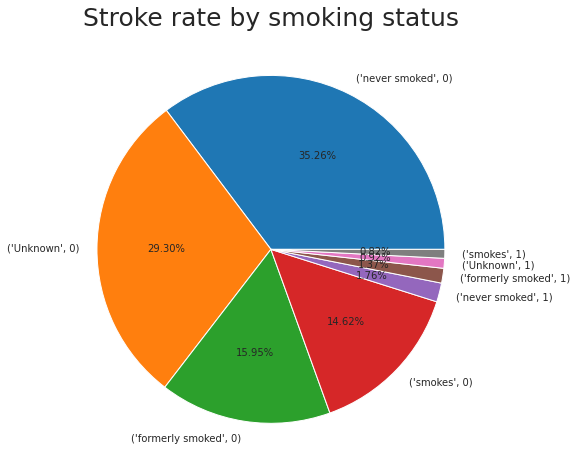

In [26]:
x = df[["smoking_status","stroke"]].value_counts(normalize = True)*100
labels = x.keys()
print(x)

plt.figure(figsize = (8,8))
plt.pie(x = x,labels = labels,autopct = "%1.2f%%")
plt.title("Stroke rate by smoking status" ,fontsize = 25)

#Model Building

In [27]:
df1.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0


In [28]:
df1.shape

(5110, 18)

In [29]:
df1["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

The dataset is imbalanced so we need to balance the date before building the model

In [30]:
x = df1.drop("stroke",axis = 1)
y = df1["stroke"]

#Using Over sampling technique to balance the data

In [31]:
!pip install imblearn

In [32]:
!pip install delayed

     |████████████████████████████████| 226 kB 7.8 MB/s 
     |████████████████████████████████| 85 kB 3.4 MB/s 


In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
over_sample = SMOTE()

In [35]:
x,y = over_sample.fit_resample(x,y)

In [36]:
from collections import Counter

In [37]:
count = Counter(y)
print(count)

Counter({1: 4861, 0: 4861})


#Here we can see the class '0' and '1' are having same counts so our data is balanced

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

#Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [40]:
model1 = LogisticRegression()
model1.fit(x_test,y_test)

LogisticRegression()

In [41]:
y_pred = model1.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,confusion_matrix,classification_report

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1216
           1       0.87      0.89      0.88      1215

    accuracy                           0.88      2431
   macro avg       0.88      0.88      0.88      2431
weighted avg       0.88      0.88      0.88      2431



In [44]:
confusion_matrix(y_test,y_pred)

array([[1051,  165],
       [ 132, 1083]])